In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
names = [
    "detuning_m250.txt",
    "detuning_m100.txt",
    "detuning_0.txt",
    "detuning_p100.txt",
    "detuning_p250.txt"
]

class curve:
    def __init__(self) -> None:
        self.times = []
        self.means = []
        self.Qs = []
        self.errs = []
        pass
    
    def sort_data(self):
        my_matrix = np.array([
            self.times,
            self.means,
            self.Qs,
            self.errs
        ])

        datas = my_matrix[:, my_matrix[0, :].argsort()]
    
        self.times = datas[0,:]
        self.means = datas[1,:]
        self.Qs = datas[2,:]
        self.errs = datas[3,:]
        return

    def plot_curve(self, color=None, label="", ax=None):
        if ax is None:
            plt.errorbar(self.times, self.means, self.errs, marker="o", color=color, label=label)
        else:
            ax.errorbar(self.times, self.means, self.errs, marker="o", color=color, label=label)
        return

curves = {}

for name in names:
    data = open(name, "r")
    curves[name] = curve()
    for i, row in enumerate(data):
        row = row.replace("\n", "")
        terms = row.split("\t")
        terms = list(map(float, terms))
        curves[name].times.append(terms[0])
        curves[name].means.append(terms[1])
        curves[name].Qs.append(terms[3])
        curves[name].errs.append(terms[4])

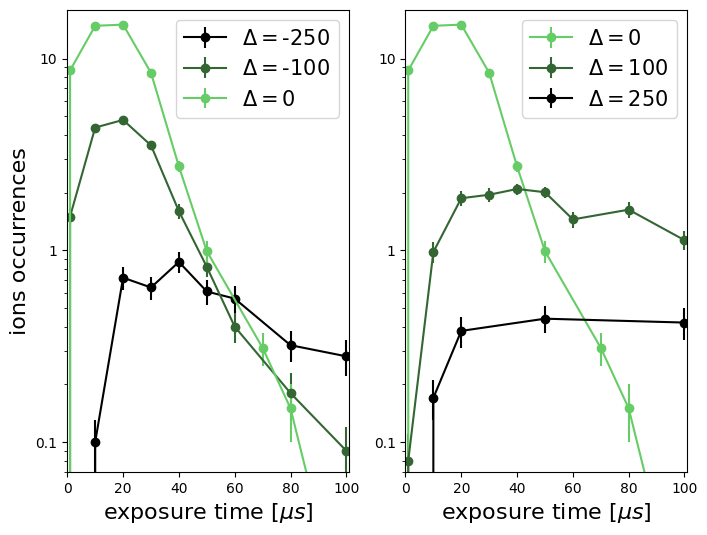

In [79]:
sums = []
dets = [-250, -100, 0, 100, 250]

plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
for i, name in enumerate(names[0:3]):
    sums.append(sum(curves[name].means))
    curves[name].sort_data()
    j=i
    curves[name].plot_curve(label=r"$\Delta=$%d"%dets[i], color=(0.2*j, 0.4*j, 0.2*j))

plt.subplot(1,2,2)
dets = [0, 100, 250]
first = 2
for i, name in enumerate(names[first:5]):
    sums.append(sum(curves[name].means))
    curves[name].sort_data()
    j = (first-i)
    curves[name].plot_curve(label=r"$\Delta=$%d"%dets[i], color=(0.2*j, 0.4*j, 0.2*j))

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.legend(fontsize=15)
    plt.xlim([0,101])
    plt.yscale("log")
    plt.ylim([0.07,18])
    plt.xlabel(r"exposure time [$\mu s$]", fontsize=16)
    plt.yticks([0.1,1,10], labels=["0.1","1","10"])
plt.subplot(1,2,1)
plt.ylabel("ions occurrences", fontsize=16)
plt.show()

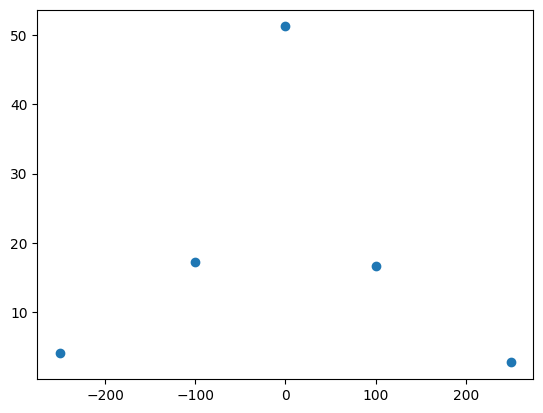

In [4]:
plt.plot(dets, sums, "o")
plt.show()